# Outliers

In [1]:
import os
import sys
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Load yaml configs

In [2]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

### Read cleaned data

In [3]:
data = pd.read_csv(config['data']['csv_clean'])

In [4]:
def plot_outliers(data, color=None):
    coli = 0
    fig,ax = plt.subplots(5,3, figsize=(15, 10)) #gridspec_kw={'width_ratios': [2,4]})
    
    for y in range(5):
        for x in range(3):    
            sx = sns.boxplot(data.iloc[:,coli], ax=ax[y,x], orient='h', color=color)
            sx.set(title=data.columns[coli], xlabel='', ylabel='')
            coli += 1
    plt.tight_layout()
    plt.show()

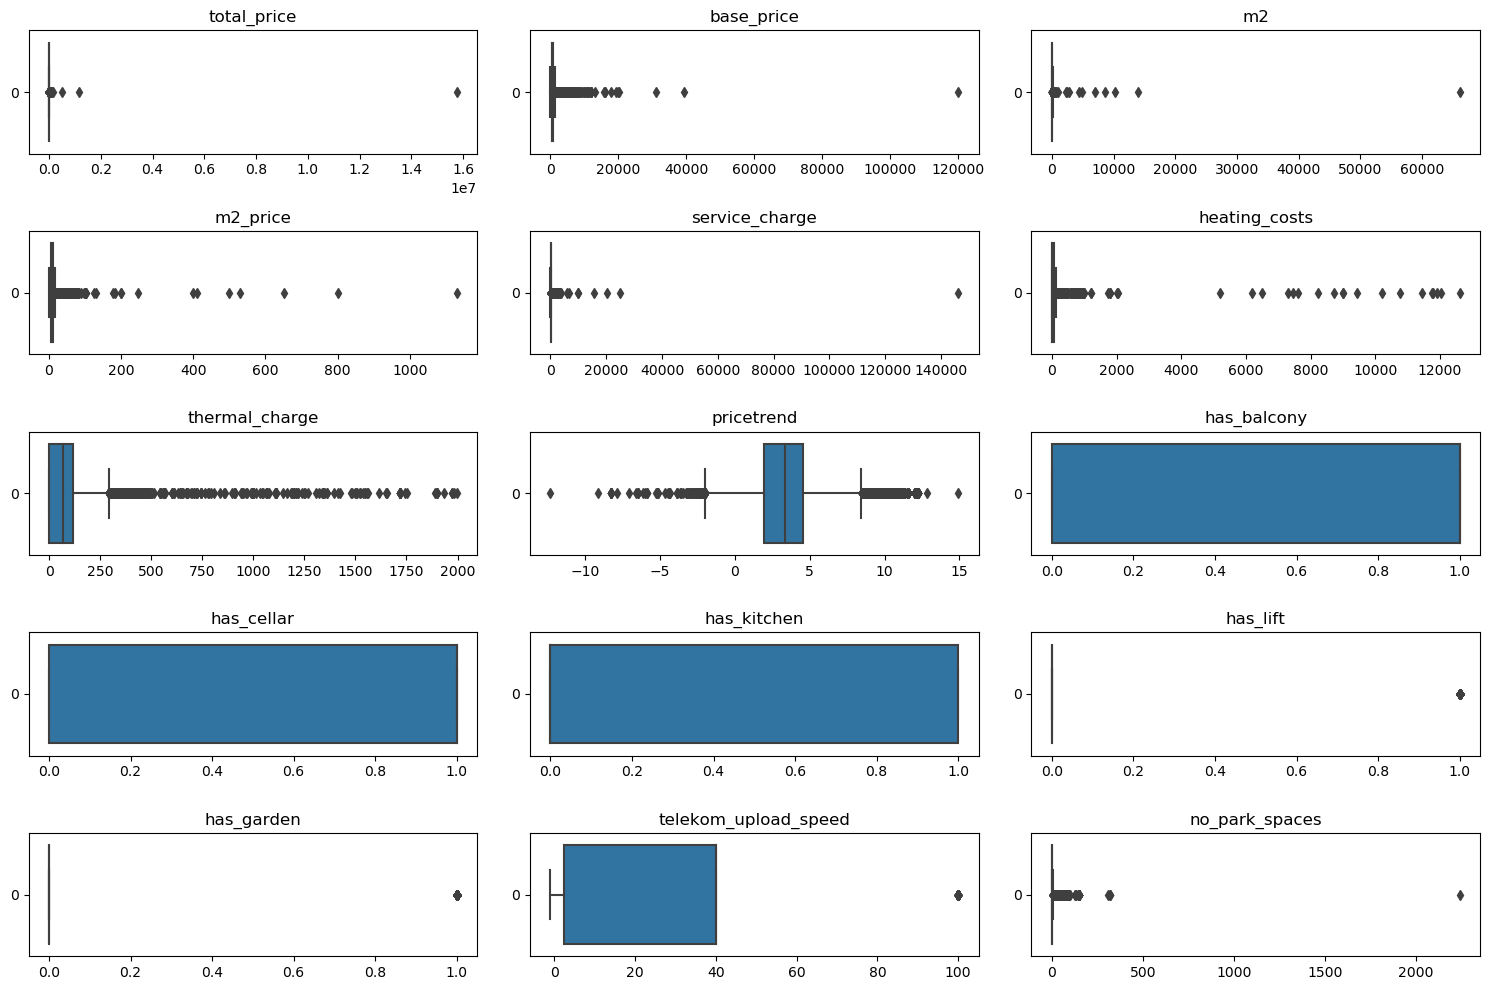

In [5]:
plot_outliers(data.select_dtypes(np.number))

As we can see, there are some outliers.

<br>

### Remove outliers
Outliers are defined as values lower or bigger than 3 times the standard deviation of a certain column.

In [6]:
def remove_outliers_std(data, th=3):
    to_remove = []
    df = data.copy()

    for col in df.columns:
        dev  = df[col].std() * th
        mean = df[col].mean()
        i = df[(df[col] < mean-dev)|(df[col] > mean+dev)].index
        to_remove += list(i)
        
    return to_remove

In [7]:
outliers = remove_outliers_std(data.select_dtypes(np.number))
data = data.drop(outliers).reset_index(drop=True)

<br>
Let's plot our numerical values again..

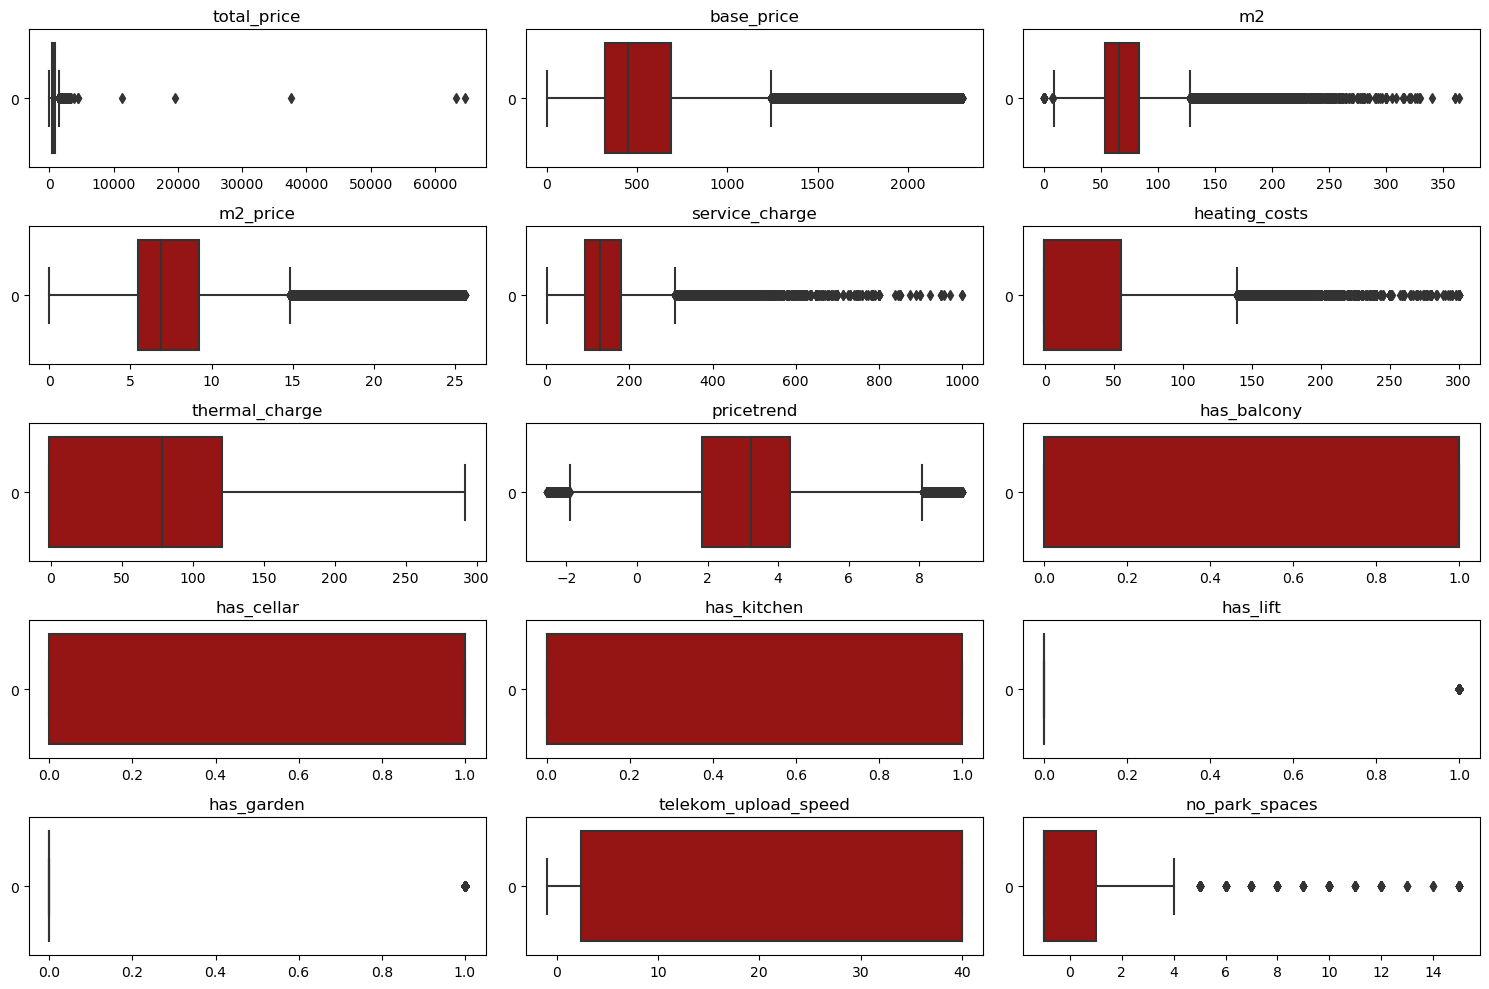

In [8]:
plot_outliers(data.select_dtypes(np.number), '#aa0000')

Okay there are still some outliers. We need to deal with them manually.<br><br>

In [9]:
def plot_outlier(data, col, color, title=''):
    fig,ax = plt.subplots(figsize=(10,1))
    sx = sns.boxplot(data[col], color=color, ax=ax, orient='h')
    sx.set(title=title, ylabel='', xlabel='')
    plt.show()

<br>

#### total_price
Remove total rental prices bigger than 8000€.

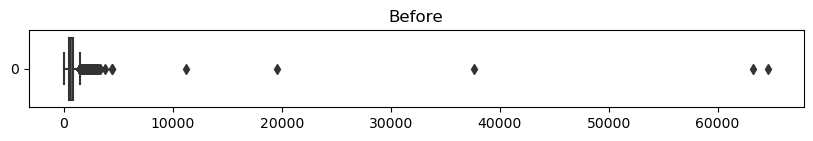

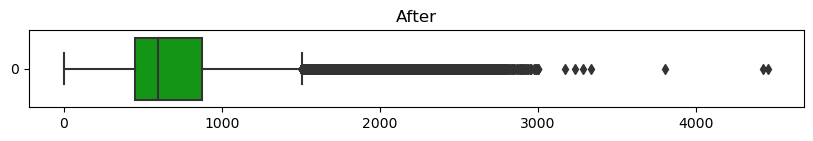

In [10]:
plot_outlier(data, 'total_price', '#00aa00', 'Before')
data = data[data['total_price'] <= 8000]
plot_outlier(data, 'total_price', '#00aa00', 'After')

#### base_price
Remove base rental prices bigger than 7500€.

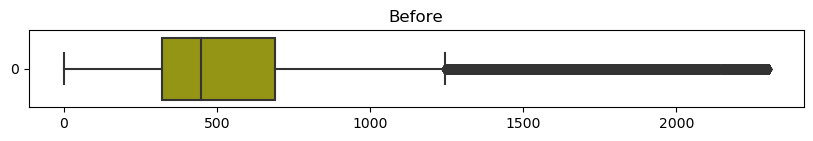

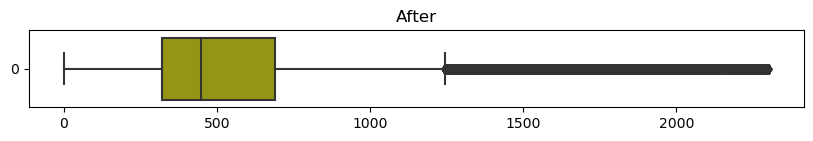

In [11]:
plot_outlier(data, 'base_price', '#aaaa00', 'Before')
data = data[data['base_price'] <= 7500]
plot_outlier(data, 'base_price', '#aaaa00', 'After')

#### m2
Remove everything bigger than 500m² here.

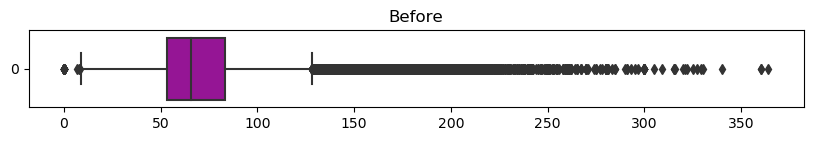

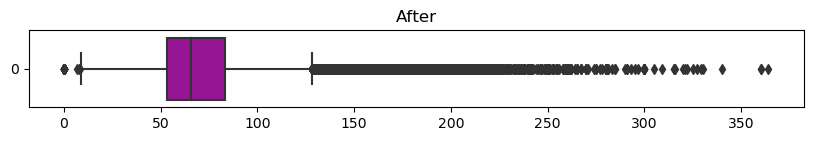

In [12]:
plot_outlier(data, 'm2', '#aa00aa', 'Before')
data = data[data['m2'] <= 370]
plot_outlier(data, 'm2', '#aa00aa', 'After')

#### m2_price
Prices bigger than 80€/m² are handled as outliers.

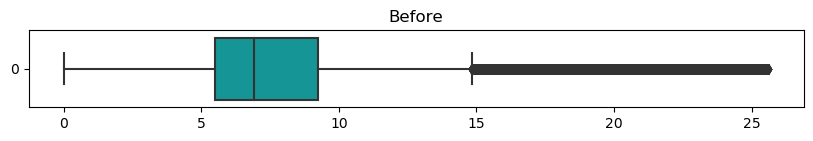

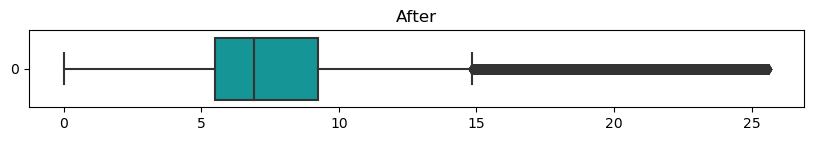

In [13]:
plot_outlier(data, 'm2_price', '#00aaaa', 'Before')
data = data[data['m2_price'] <= 80]
plot_outlier(data, 'm2_price', '#00aaaa', 'After')

#### service_charge
We set all negative values to -1, since -1 stands for 'unknown'.

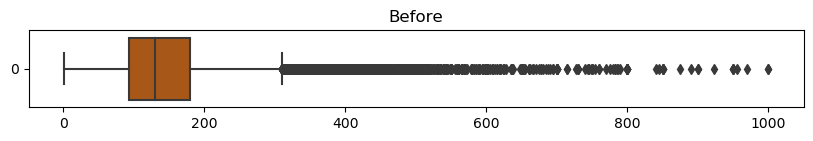

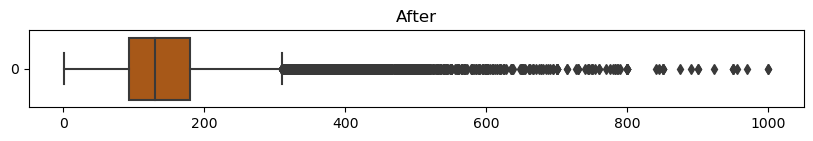

In [14]:
plot_outlier(data, 'service_charge', '#bf5600', 'Before')
data['service_charge'] = data['service_charge'].apply(lambda x: -1 if x < -1 else x)
plot_outlier(data, 'service_charge', '#bf5600', 'After')

<br>
Now, all outliers should be gone but let's check the boxplots again...
<br>

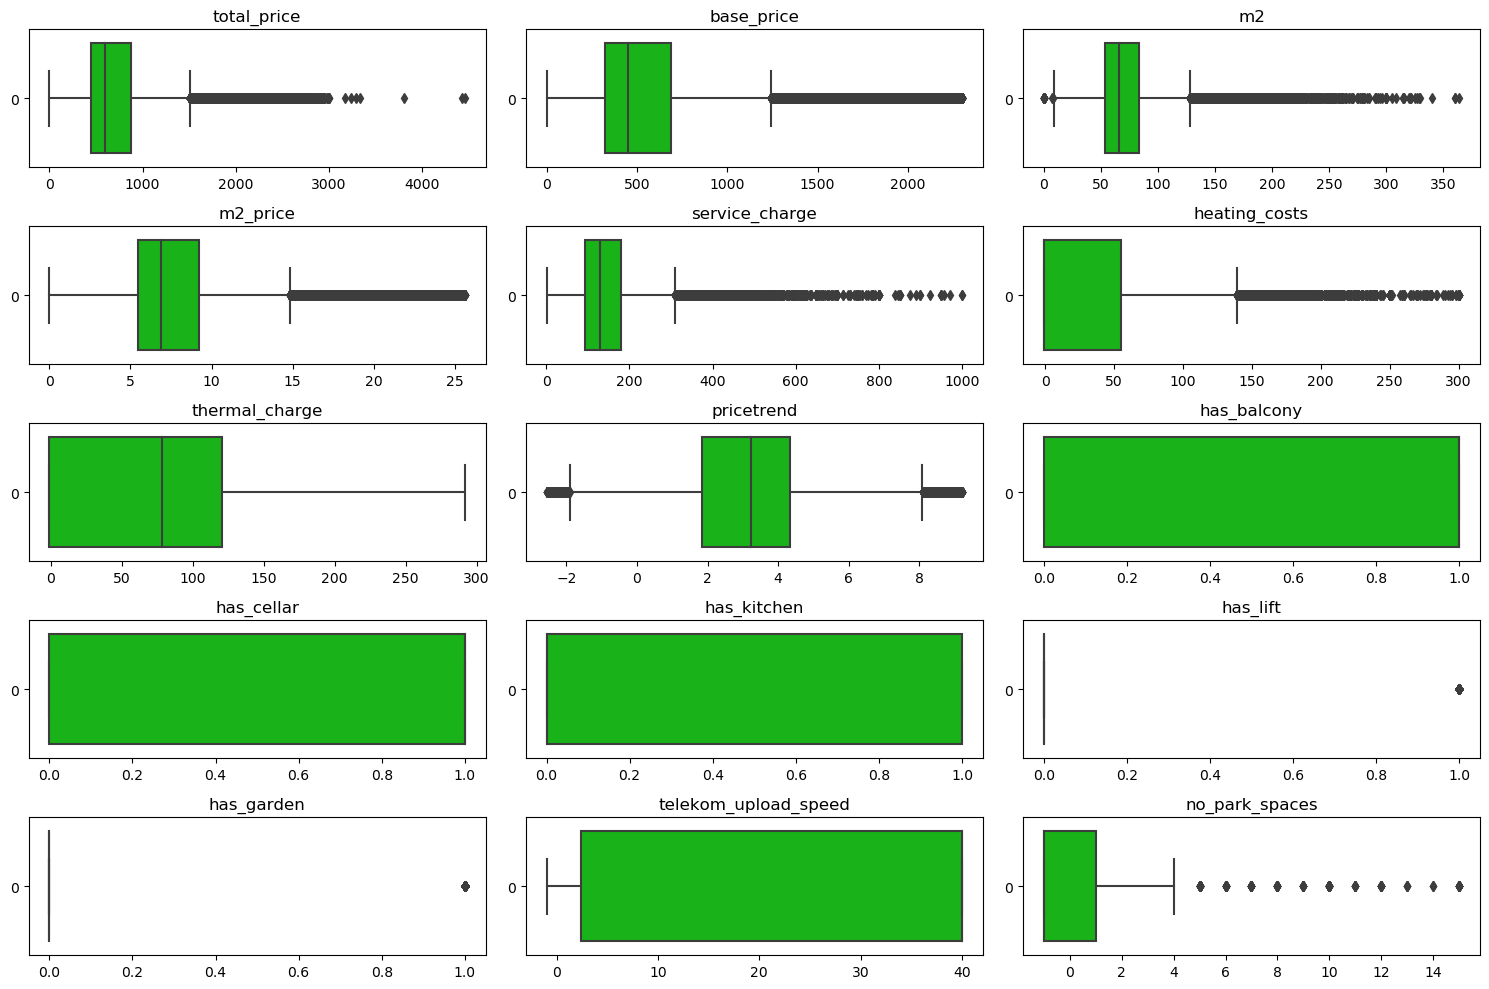

In [15]:
plot_outliers(data.select_dtypes(np.number), '#00cc00')

That looks good so far, let's leave it like this..

<br>

### Store dataset

In [16]:
data.to_csv(config['data']['csv_clean'], index=False)